# Install Packages and Libraries

In [1]:
# Install packages
%pip install -U ipykernel matplotlib pandas

# Import libraries
from matplotlib import pyplot as plt
from pandas import read_csv
from random import choice, randint
from kMeans import kMeans # Import the kMeans model

Note: you may need to restart the kernel to use updated packages.


# Load and Clean the Data

In [2]:
df = read_csv("iris.csv")
df.drop(columns=["species"], inplace=True)
matrix = (df.to_numpy().tolist())

# Train Models

In [14]:
# Initialize the models
groups = 3
models: list[kMeans] = [
    kMeans(
        trainingMatrix=matrix,
        kGroups=groups,
        distanceStrategy="MANHATTAN",
        centroidStrategy="mean"
        
    ),
    kMeans(
        trainingMatrix=matrix,
        kGroups=groups,
        distanceStrategy="MANHATTAN",
        centroidStrategy="median"
    )
]

# Train the models
epochs = [
    models[0].Train(),
    models[1].Train()
]

# Graph Clusters

*Colors are assigned randomly*

manhattan clustering epochs: 11
37 : [6.8703, 3.0865, 5.7459, 2.0892]
50 : [5.006, 3.418, 1.464, 0.244]
63 : [5.9048, 2.746, 4.4127, 1.4333]
manhattan clustering epochs: 4
40 : [6.8, 3.0, 5.5, 2.1]
60 : [5.7, 2.8, 4.5, 1.3]
50 : [5.0, 3.4, 1.5, 0.2]


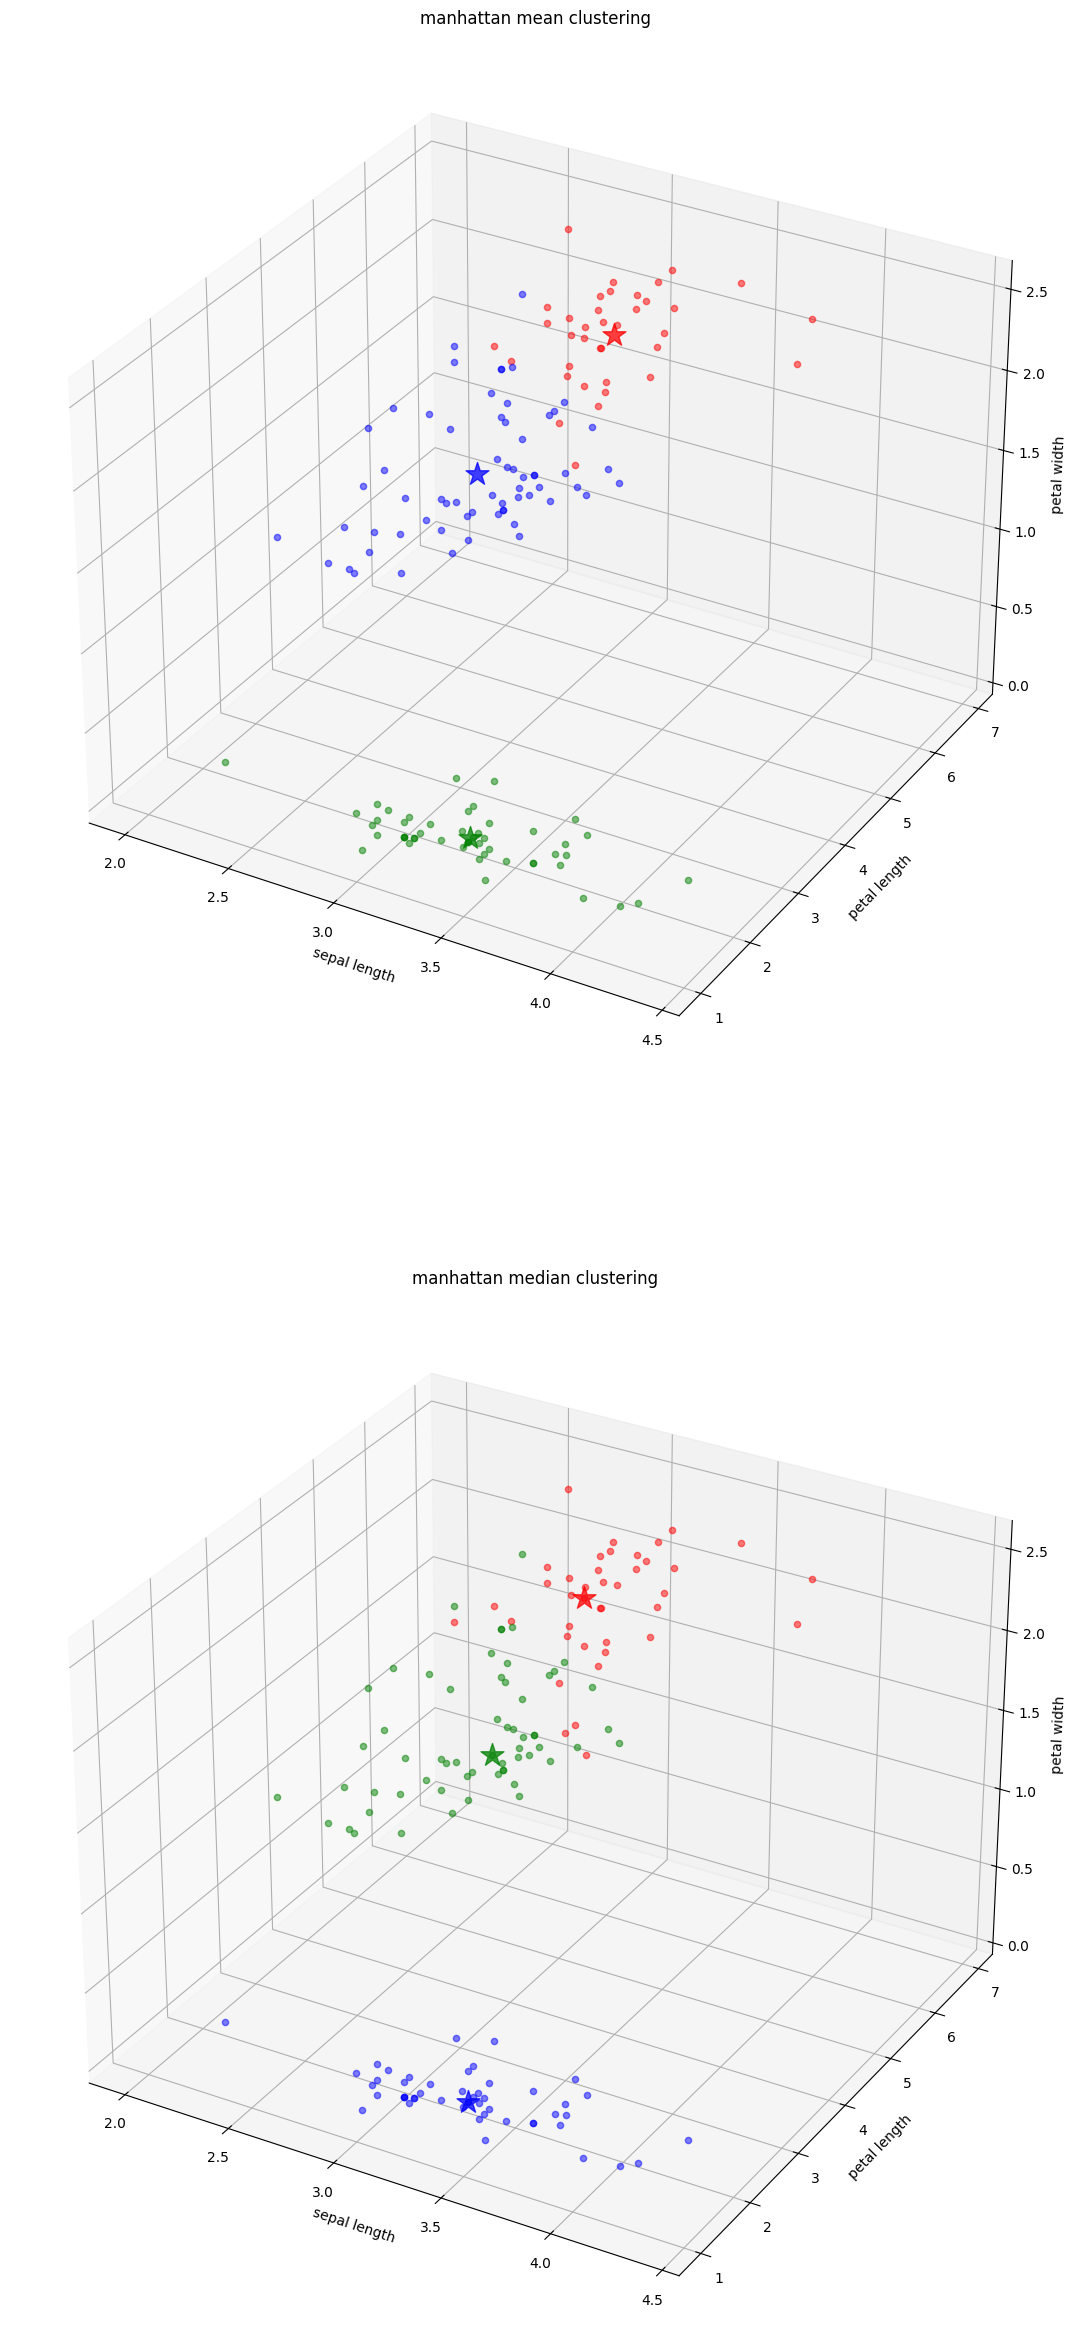

In [15]:
def Draw_Clusters(model: kMeans, axis: plt.Axes, epoch: int) -> None:
    print(f"{model.distanceStrategy} clustering epochs: {epoch}")

    axis.set_title(f"{model.distanceStrategy} {model.centroidStrategy} clustering")
    axis.set_xlabel('sepal length')
    axis.set_ylabel('petal length')
    axis.set_zlabel('petal width')

    for cIndex, cluster in enumerate(model.clusters):
        print(f"{len(cluster.vectors)} : {cluster.centroid}")
        clusterColor: str = colors[cIndex]
        # Plot Vectors
        for vector in cluster.vectors:
            axis.scatter(vector[1], vector[2], vector[3], color=clusterColor, alpha=0.5)
        # Plot Centroid
        axis.scatter(cluster.centroid[1], cluster.centroid[2], cluster.centroid[3], color=clusterColor, marker='*', alpha=.75, s=300)

colors = ['red', 'green', 'blue']

# Prepare for visualization
figure = plt.figure(figsize=(20, 30))
grid = figure.add_gridspec(len(models), 1)
axises = grid.subplots(subplot_kw={"projection": "3d"})

# Draw clusters
for axis, model, epoch in zip(axises, models, epochs):
    Draw_Clusters(model, axis, epoch)

plt.show()